# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import seaborn as sns
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
#Commented out to prevent rerunning the kernel

# Create weather url

#Reference activity day 2 activity

#Create lists to store values

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 0
sets = 1

temp_units = "imperial"
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
weather_query_url = weather_url + "appid=" + weather_api_key + "&units=imperial" + "&q="

print("Beginning Data Retrieval")     
print("-----------------------------")

for city in cities:
    try:
        weather_response = requests.get(weather_query_url + city).json()
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        if record > 49:
            sets = sets + 1
            record = 1
        print(f"Processing Record {record} of set {sets} {city}")
        record = record + 1
        time.sleep(1)
    except KeyError:
        print("City not found. Skipping...")
    

Beginning Data Retrieval
-----------------------------
Processing Record 0 of set 1 atuona
Processing Record 1 of set 1 bluff
Processing Record 2 of set 1 yumen
Processing Record 3 of set 1 santa vitoria do palmar
Processing Record 4 of set 1 mount gambier
Processing Record 5 of set 1 cidreira
Processing Record 6 of set 1 ribeira grande
Processing Record 7 of set 1 port hardy
Processing Record 8 of set 1 tasiilaq
Processing Record 9 of set 1 ternate
Processing Record 10 of set 1 hobart
Processing Record 11 of set 1 busselton
Processing Record 12 of set 1 sao joao da barra
Processing Record 13 of set 1 mataura
Processing Record 14 of set 1 salalah
Processing Record 15 of set 1 ushuaia
Processing Record 16 of set 1 new norfolk
Processing Record 17 of set 1 tiksi
Processing Record 18 of set 1 coquimbo
Processing Record 19 of set 1 vaini
Processing Record 20 of set 1 itoman
Processing Record 21 of set 1 rikitea
Processing Record 22 of set 1 albany
Processing Record 23 of set 1 gimli
Proces

Processing Record 47 of set 4 finschhafen
City not found. Skipping...
Processing Record 48 of set 4 port lincoln
Processing Record 49 of set 4 ilhabela
Processing Record 1 of set 5 vardo
Processing Record 2 of set 5 vila franca do campo
Processing Record 3 of set 5 banjar
Processing Record 4 of set 5 talnakh
Processing Record 5 of set 5 ilulissat
City not found. Skipping...
Processing Record 6 of set 5 varkaus
Processing Record 7 of set 5 komaki
Processing Record 8 of set 5 adrar
Processing Record 9 of set 5 chokurdakh
Processing Record 10 of set 5 casper
Processing Record 11 of set 5 lloydminster
City not found. Skipping...
Processing Record 12 of set 5 ouadda
Processing Record 13 of set 5 anahuac
Processing Record 14 of set 5 mehamn
Processing Record 15 of set 5 guhagar
Processing Record 16 of set 5 shiliguri
Processing Record 17 of set 5 ostrovnoy
Processing Record 18 of set 5 kelvington
Processing Record 19 of set 5 piney green
Processing Record 20 of set 5 buin
Processing Record 2

City not found. Skipping...
Processing Record 5 of set 9 presidente epitacio
Processing Record 6 of set 9 harper
Processing Record 7 of set 9 cody
Processing Record 8 of set 9 anadyr
Processing Record 9 of set 9 grand gaube
Processing Record 10 of set 9 pisco
Processing Record 11 of set 9 cayenne
Processing Record 12 of set 9 igrim
Processing Record 13 of set 9 calama
Processing Record 14 of set 9 ghanzi
Processing Record 15 of set 9 omboue
Processing Record 16 of set 9 jinchang
Processing Record 17 of set 9 lang son
Processing Record 18 of set 9 surt
Processing Record 19 of set 9 puerto princesa
Processing Record 20 of set 9 cervo
Processing Record 21 of set 9 sabha
Processing Record 22 of set 9 paita
Processing Record 23 of set 9 fortuna
Processing Record 24 of set 9 regeneracao
Processing Record 25 of set 9 marzuq
Processing Record 26 of set 9 orange
Processing Record 27 of set 9 salinopolis
Processing Record 28 of set 9 dunedin
Processing Record 29 of set 9 sambava
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
output_path = "output_data/city_weather.csv"

cities_df = pd.DataFrame({"City": city_name,
                          "Country": country,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Date": date})
#store dataframe as csv

cities_df.to_csv(output_path, sep=',', index=False)

#print preview of csv file

cities_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Atuona,PF,-9.80,-139.03,78.01,74,75,15.43,1603241225
1,Bluff,NZ,-46.60,168.33,57.00,60,84,7.00,1603241787
2,Yumen,CN,40.28,97.20,47.19,41,0,7.34,1603241788
3,Santa Vitória do Palmar,BR,-33.52,-53.37,58.12,75,100,11.99,1603241789
4,Mount Gambier,AU,-37.83,140.77,59.00,72,90,9.17,1603241790


In [49]:
#Create summary of the dataframe

cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.018168,15.912757,60.258185,73.294939,50.938918,8.034171,1.603242e+09
std,32.779293,91.430836,19.770113,19.751301,40.766195,5.493066,2.602904e+02
min,-54.800000,-179.170000,1.400000,9.000000,0.000000,0.090000,1.603241e+09
25%,-7.740000,-63.000000,46.000000,64.000000,1.000000,4.000000,1.603242e+09
50%,25.200000,19.490000,64.400000,78.000000,55.000000,6.850000,1.603242e+09
75%,47.380000,96.170000,76.960000,88.000000,90.000000,11.410000,1.603242e+09
max,78.220000,179.320000,91.400000,100.000000,100.000000,32.210000,1.603242e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
#No cities with humidity greater then 100--skipping this step

In [51]:
#  Get the indices of cities that have humidity over 100%.

#No cities with humidity greater then 100--skipping this step

In [52]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#No cities with humidity greater then 100--skipping this step

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

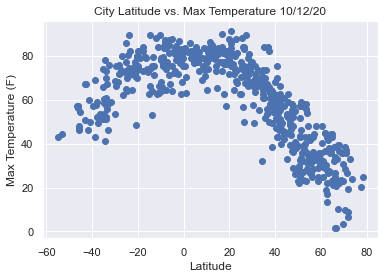

In [53]:
# Create a Scatter Plot for Latitute vs. max temp

sns.set()

latitude_values = cities_df['Lat']
maxtemp_values = cities_df["Max Temp"]  
plt.scatter(latitude_values, maxtemp_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature 10/12/20')
plt.savefig('figures\lat_v_temp.png')
plt.show()

This plot shows the representation between how north/south a city is and the corresponding temperature. The reason for the curved shape is because cities near zero latitude or the equator are hottest and then will drop again as we move farther away. 

## Latitude vs. Humidity Plot

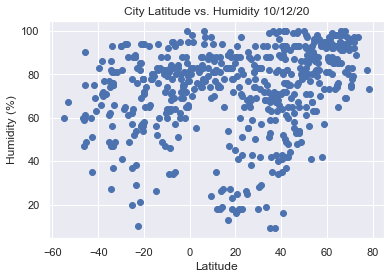

In [54]:
humidity_values = cities_df["Humidity"]
plt.scatter(latitude_values, humidity_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity 10/12/20')
plt.savefig('figures\lat_v_humidity.png')
plt.show()

This plot compares humidity and latitude on a scatter plot. There seems to be more data clumped towards the center where the equator is but also at a high positive latitude. It is hard to tell if there is any real relationship between the two.

## Latitude vs. Cloudiness Plot

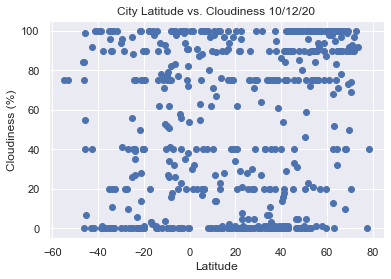

In [55]:
cloud_values = cities_df["Cloudiness"]
plt.scatter(latitude_values, cloud_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness 10/12/20')
plt.savefig('figures\lat_v_cloudiness.png')
plt.show()

This plot displays a scatter of cloudiness by latitude. There does not appear to be any relationship between the two values as there are no consistent clusters of data points.

## Latitude vs. Wind Speed Plot

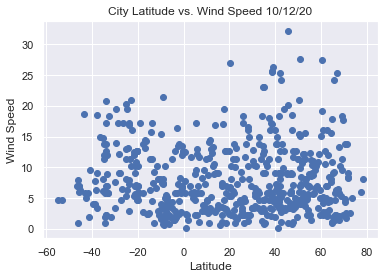

In [56]:
wind_values = cities_df["Wind Speed"]
plt.scatter(latitude_values, wind_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed 10/12/20')
plt.savefig('figures\lat_v_wind.png')
plt.show()

This scatter compares wind speed at each city by their latitude. Again, there is no real clustering of data other than the fact that most cities have wind speed under 20 mph.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7821145242514468


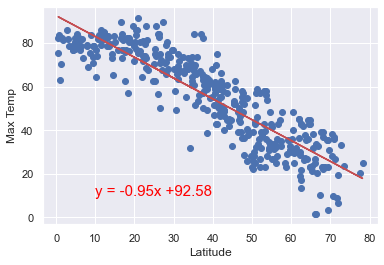

In [57]:
nor_lat_values = cities_df['Lat'].loc[(cities_df['Lat'] > 0)]
nor_temp_values = cities_df['Max Temp'].loc[(cities_df['Lat'] > 0)]

#Create regression line for graph

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nor_lat_values, nor_temp_values)

regress_values = nor_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(nor_lat_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

#Create scatterplot for northern hemisphere

plt.scatter(nor_lat_values, nor_temp_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('north_lat_v_temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.48601069091295085


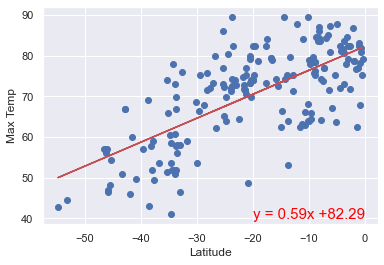

In [58]:
so_lat_values = cities_df['Lat'].loc[(cities_df['Lat'] < 0)]
so_temp_values = cities_df['Max Temp'].loc[(cities_df['Lat'] < 0)]

#Create regression line for graph

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(so_lat_values, so_temp_values)

so_regress_values = so_lat_values * slope + intercept
so_line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(so_lat_values,so_regress_values,"r-")
plt.annotate(so_line_eq,(-20,40),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.scatter(so_lat_values, so_temp_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('figures\so_lat_v_temp.png')
plt.show()

Here we have temperatures in each city and their latitude broken out by hemisphere. It is nice to break the hemispheres out because now we can show the linear regression for each of them. In the northern hemisphere, there is negative correlation: As the latitude increases temperature decreases. In the southern hemisphere, the inverse is true: temperature is positively correlated with latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07258500783084658


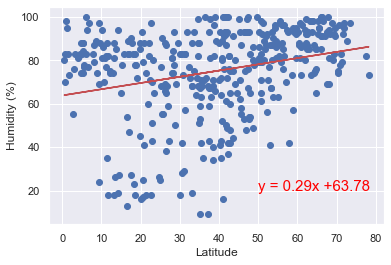

In [59]:
nor_hum_values = cities_df['Humidity'].loc[(cities_df['Lat'] > 0)]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nor_lat_values, nor_hum_values)

norhum_regress_values = nor_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(nor_lat_values,norhum_regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

#Create scatterplot for northern hemisphere

plt.scatter(nor_lat_values, nor_hum_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('north_lat_v_hum.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03627573412802549


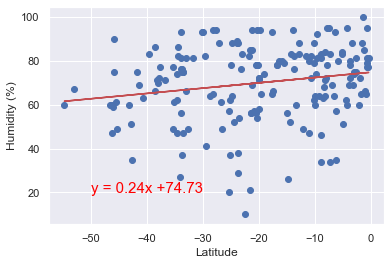

In [60]:
so_hum_values = cities_df['Humidity'].loc[(cities_df['Lat'] < 0)]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(so_lat_values, so_hum_values)

sohum_regress_values = so_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(so_lat_values,sohum_regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

#Create scatterplot for northern hemisphere

plt.scatter(so_lat_values, so_hum_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('figures\so_lat_v_hum.png')
plt.show()

We have a similar breakout by hemisphere for humidity percentage. The correlation for the northern hemisphere is just barely significant being over .05 in r-value and increases with latitude. In the southern hemisphere, the r-value is not statistically significant and the correlation is the opposite of what we would expect given what we saw in the northern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07177748519162899


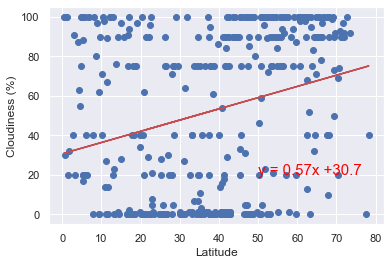

In [61]:
nor_cloud_values = cities_df['Cloudiness'].loc[(cities_df['Lat'] > 0)]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nor_lat_values, nor_cloud_values)

norcloud_regress_values = nor_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(nor_lat_values,norcloud_regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

#Create scatterplot for northern hemisphere

plt.scatter(nor_lat_values, nor_cloud_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('north_lat_v_cloud.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.012377551131212281


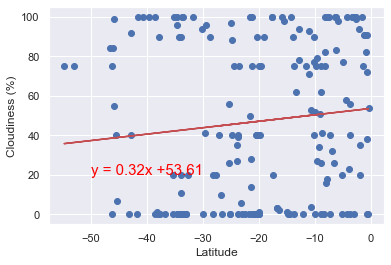

In [62]:
so_cloud_values = cities_df['Cloudiness'].loc[(cities_df['Lat'] < 0)]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(so_lat_values, so_cloud_values)

socloud_regress_values = so_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(so_lat_values,socloud_regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

#Create scatterplot for northern hemisphere

plt.scatter(so_lat_values, so_cloud_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('figures\south_lat_v_cloud.png')
plt.show()

With cloudiness also broken out by hemisphere, we see positive correlation when compared to latitude in the northern hemisphere. The same is true in the southern hemisphere though the correlation is not significant. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.003943536354687814


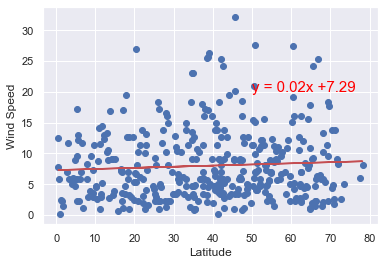

In [63]:
nor_wind_values = cities_df['Wind Speed'].loc[(cities_df['Lat'] > 0)]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nor_lat_values, nor_wind_values)

norwind_regress_values = nor_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(nor_lat_values,norwind_regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

#Create scatterplot for northern hemisphere

plt.scatter(nor_lat_values, nor_wind_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('north_lat_v_wind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.024448787722518125


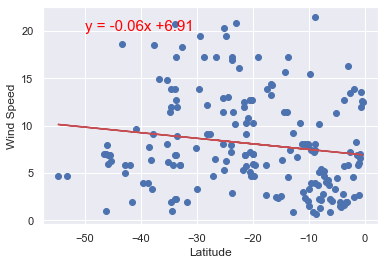

In [64]:
so_wind_values = cities_df['Wind Speed'].loc[(cities_df['Lat'] < 0)]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(so_lat_values, so_wind_values)

sowind_regress_values = so_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(so_lat_values,sowind_regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

#Create scatterplot for northern hemisphere

plt.scatter(so_lat_values, so_wind_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('figures\so_lat_v_wind.png')
plt.show()

The last graph shows wind speed against latitude. Niether r-value is significant so we can assume there is no relationship in this data.

Observable trends:

1) Temperature is generally going to be higher as we move closer to the equator, or zero latitude. The temperture is going to drop off as you move to higher latitudes or closer to the poles. 

2) Humidity may have some relation to latitude although it is hard to tell based on the data available. It appears that there are more northern hemisphere cities represented so maybe if we included more southern hemisphere cities the data would be more accurate for this.

3) There is no relationship between latitude and wind speed or cloudiness. For the most part, these graphs all had small r-values. 